In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

V_avg = 5.230 m/s


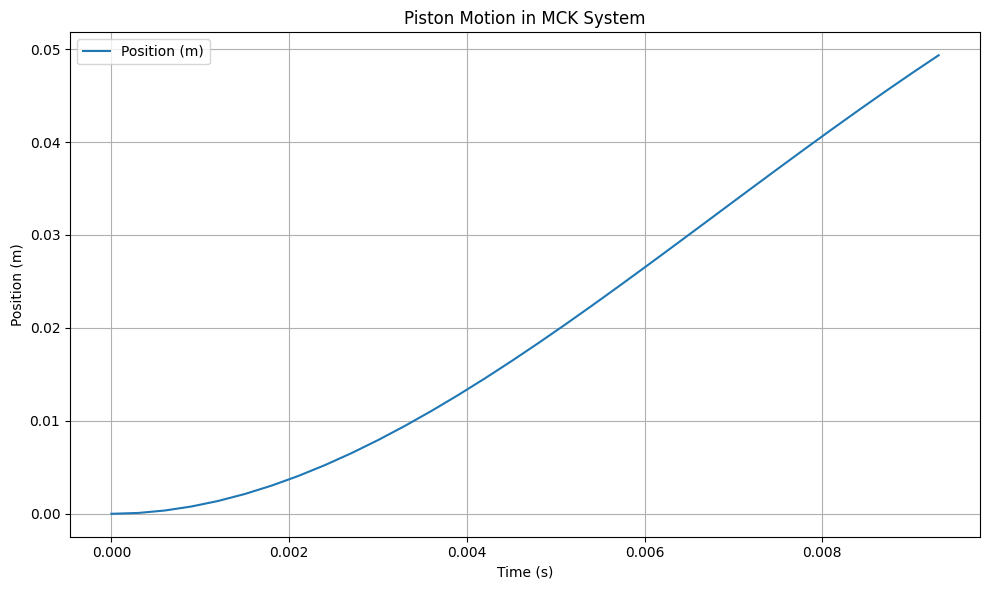

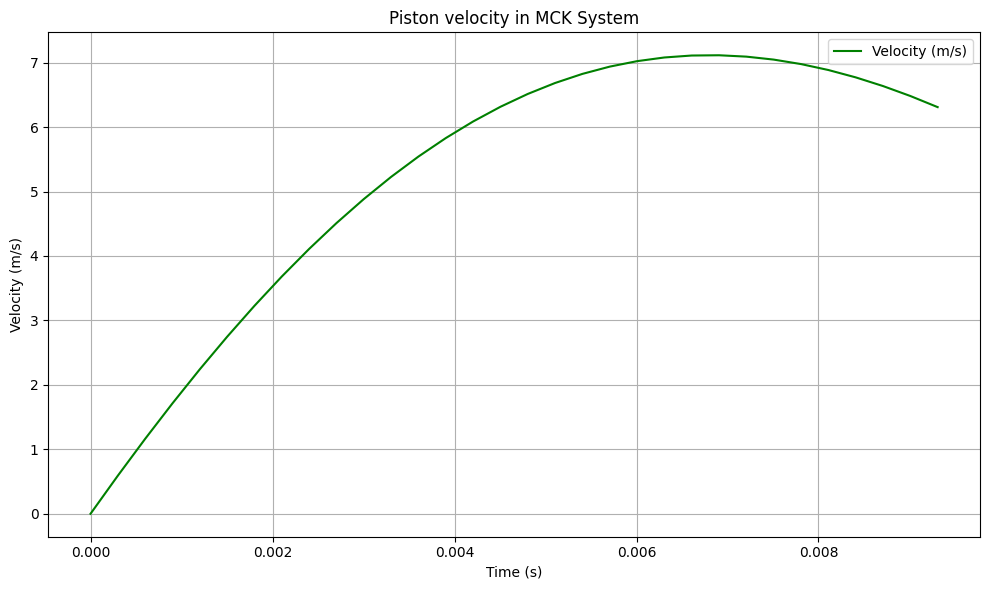

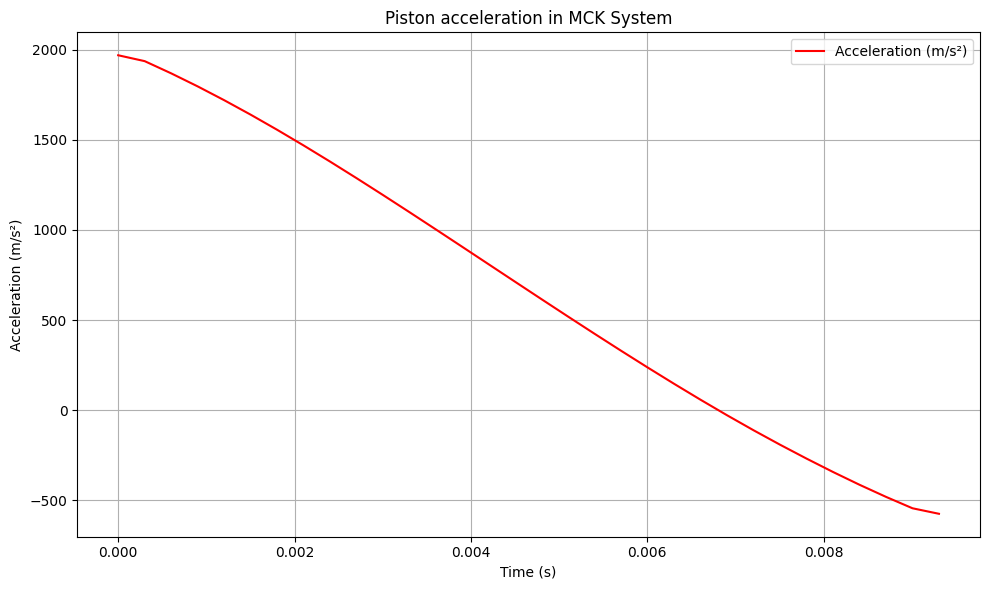

In [18]:
# 시스템 파라미터 설정
F_finger = 10           # 손가락 힘 (N)
d_p = 0.008             # 피스톤 직경 (m)
m = 0.005               # 피스톤 질량 (kg)
k = 200                 # 스프링 상수 (N/m)
c = 0.5                 # 감쇠 계수 (Ns/m)
x_limit = 0.05          # 최대 스트로크 거리 (m)

# 외력 함수
def force(t):
    return F_finger

# MCK 시스템 방정식
def mck_system(t, y):
    x, v = y
    dxdt = v
    dvdt = (force(t) - c * v - k * x) / m
    return [dxdt, dvdt]

# 이벤트 함수: 스트로크 제한 도달 시 해석 종료
def reach_stroke_limit(t, y):
    return y[0] - x_limit  # x - 최대 스트로크
reach_stroke_limit.terminal = True  # 이벤트 발생 시 통합 종료
reach_stroke_limit.direction = 1    # x가 증가할 때만 감지

# 초기 조건 및 시간 설정
y0 = [0.0, 0.0]
t_span = (0, 0.3)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# 수치 해석 실행
sol = solve_ivp(
    mck_system,
    t_span,
    y0,
    t_eval=t_eval,
    events=reach_stroke_limit
)
x = sol.y[0]
v = sol.y[1]
a = np.gradient(v, sol.t)

v_avg = np.mean(v)
print(f"V_avg = {v_avg:.3f} m/s")

# 그래프 출력 (선택)
plt.figure(figsize=(10, 6))
plt.plot(sol.t, x, label='Position (m)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Piston Motion in MCK System')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sol.t, v,'g', label='Velocity (m/s)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Piston velocity in MCK System')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sol.t, a, 'r' , label='Acceleration (m/s²)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Piston acceleration in MCK System')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()